In [1]:
import numpy as np
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(42)

In [ ]:
pkn = yf.Ticker("pkn.wa")

pkn_hist = pkn.history(start="2000-01-01", end="2024-03-01", interval="1d")

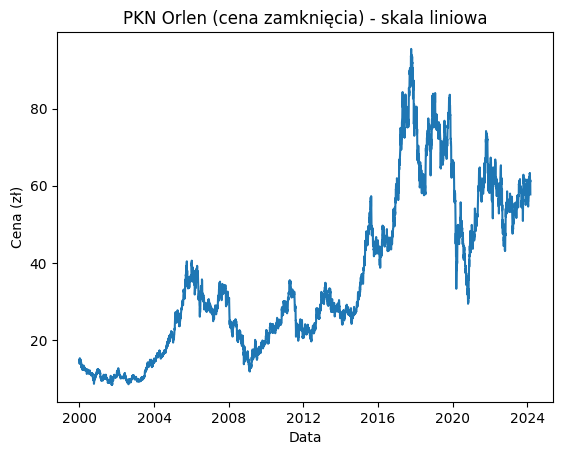

In [ ]:
plt.plot(pkn_hist['Close'])
plt.title("PKN Orlen (cena zamknięcia) - skala liniowa")
plt.xlabel("Data")
plt.ylabel("Cena (zł)")
plt.show()

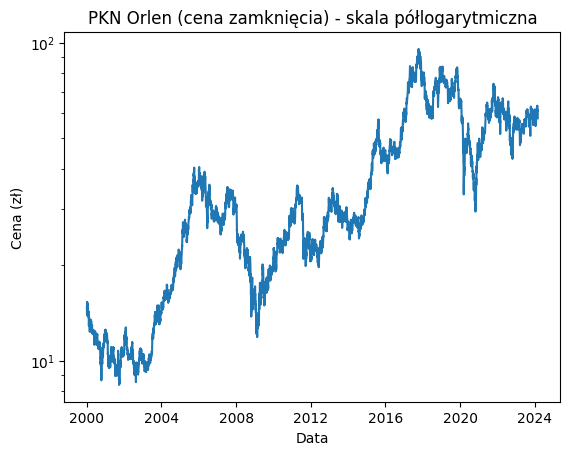

In [ ]:
plt.plot(pkn_hist['Close'])
plt.title("PKN Orlen (cena zamknięcia) - skala półlogarytmiczna")
plt.yscale('log')
plt.xlabel("Data")
plt.ylabel("Cena (zł)")
plt.show()

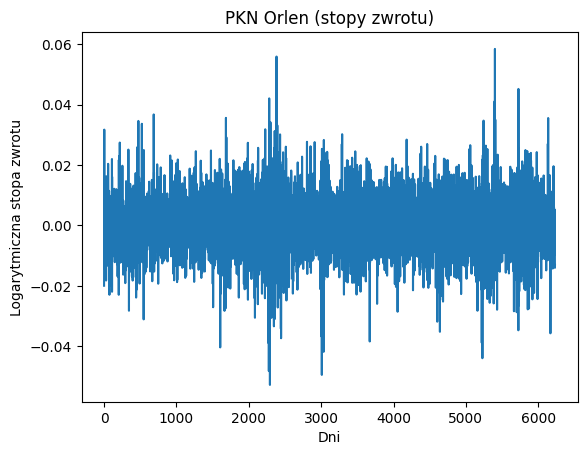

In [ ]:
prices = pkn_hist['Close'].values
prices_log = np.log10(prices)

# Logarytmiczne stopy zwrotu
log_return_rates = np.diff(prices_log)

# Wykres
plt.plot(log_return_rates)
plt.title('PKN Orlen (stopy zwrotu)')
plt.ylabel('Logarytmiczna stopa zwrotu')
plt.xlabel('Dni')
plt.show()

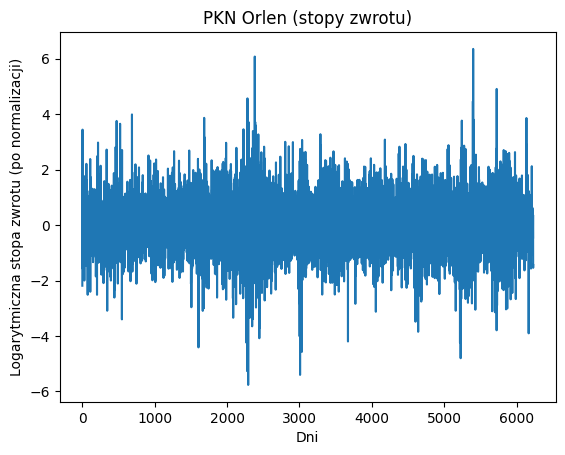

In [ ]:
# Normalizacja
mean = np.mean(log_return_rates)
std = np.std(log_return_rates)
log_return_rates_norm = (log_return_rates - mean) / std

# Wykres
plt.plot(log_return_rates_norm)
plt.title('PKN Orlen (stopy zwrotu)')
plt.ylabel('Logarytmiczna stopa zwrotu (po normalizacji)')
plt.xlabel('Dni')
plt.show()

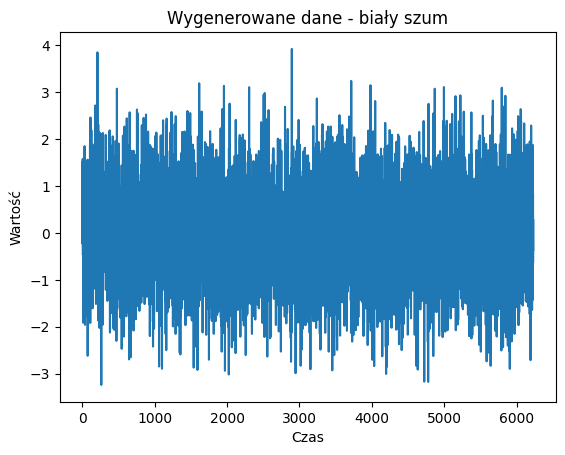

In [ ]:
# Generowanie danych o rozkładzie normalnym
white_noise = np.random.normal(0, 1, len(log_return_rates_norm))

# Wykres
plt.plot(white_noise)
plt.title('Wygenerowane dane - biały szum')
plt.ylabel('Wartość')
plt.xlabel('Czas')
plt.show()

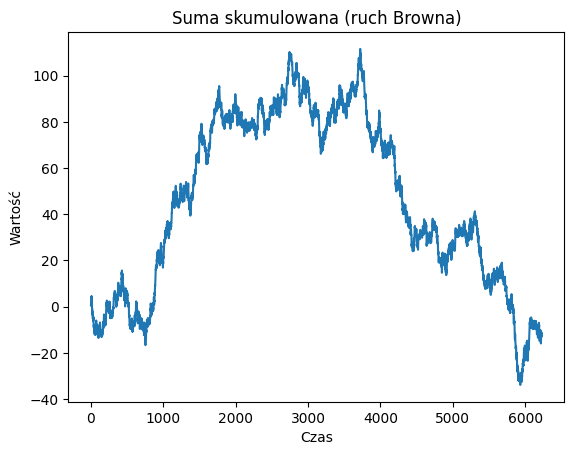

In [ ]:
# Obliczenie sumy skumulowanej
brown_motion = np.cumsum(white_noise)

# Wykres
plt.plot(brown_motion)
plt.title('Suma skumulowana (ruch Browna)')
plt.ylabel('Wartość')
plt.xlabel('Czas')
plt.show()

Skośność szumu białego: 0.02, Kurtoza: 0.03
Skośność stóp zwrotu: -0.01, Kurtoza: 2.10


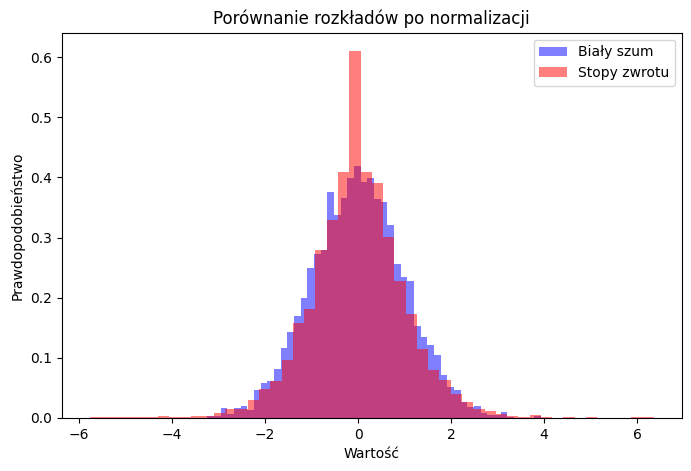

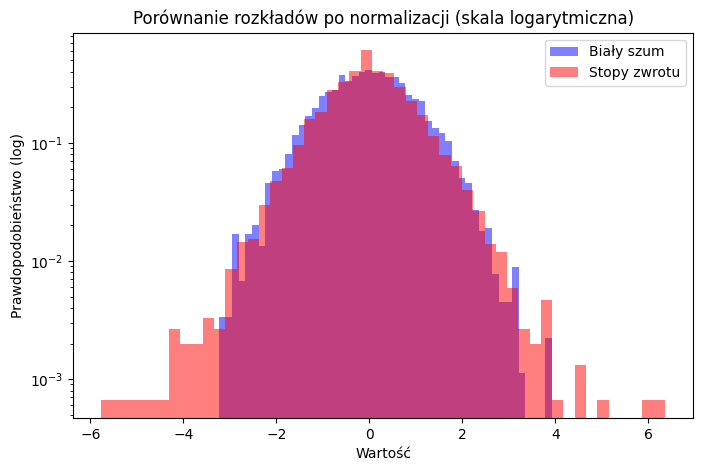

In [ ]:
bins = 50  # Liczba przedziałów

hist_wn, bins_wn = np.histogram(white_noise, bins=bins, density=True)  # Histogram dla szumu białego
hist_sr, bins_sr = np.histogram(log_return_rates_norm, bins=bins, density=True)  # Histogram dla stóp zwrotu

# Obliczenie skośności i kurtozy
skew_wn, kurt_wn = stats.skew(white_noise), stats.kurtosis(white_noise)
skew_sr, kurt_sr = stats.skew(log_return_rates_norm), stats.kurtosis(log_return_rates_norm)

print(f"Skośność szumu białego: {skew_wn:.2f}, Kurtoza: {kurt_wn:.2f}")
print(f"Skośność stóp zwrotu: {skew_sr:.2f}, Kurtoza: {kurt_sr:.2f}")

# Wykres histogramów (z normalizacją)
plt.figure(figsize=(8, 5))
plt.hist(white_noise, bins=bins, density=True, alpha=0.5, label="Biały szum", color="blue")
plt.hist(log_return_rates_norm, bins=bins, density=True, alpha=0.5, label="Stopy zwrotu", color="red")
plt.title("Porównanie rozkładów po normalizacji")
plt.xlabel("Wartość")
plt.ylabel("Prawdopodobieństwo")
plt.legend()
plt.show()

# Wykres w skali logarytmicznej
plt.figure(figsize=(8, 5))
plt.hist(white_noise, bins=bins, density=True, alpha=0.5, label="Biały szum", color="blue")
plt.hist(log_return_rates_norm, bins=bins, density=True, alpha=0.5, label="Stopy zwrotu", color="red")
plt.yscale("log")
plt.title("Porównanie rozkładów po normalizacji (skala logarytmiczna)")
plt.xlabel("Wartość")
plt.ylabel("Prawdopodobieństwo (log)")
plt.legend()
plt.show()